In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree, metrics
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NeighbourhoodCleaningRule
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.deprecation")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")

### Reading data from Input file

In [2]:
def readData(filename):
    data = pd.read_csv(filename)
    return data

###  Data Preprocessing

In [3]:
def dataPreprocessing(dataframe):
    le = preprocessing.LabelEncoder()
    le.fit(dataframe['Loan Status'])
    dataframe['Loan Status'] = le.transform(dataframe['Loan Status'])
    le.fit(dataframe['Term'])
    dataframe['Term'] = le.transform(dataframe['Term'])
    l = dataframe['Years in current job']
    change = []
    for i in l:
        if (i == '<1 year'):
            change.append(0)
        elif (i == '1 year'):
            change.append(1)
        elif (i == '2 years'):
            change.append(2)
        elif (i == '3 years'):
            change.append(3)
        elif (i == '4 years'):
            change.append(4)
        elif (i == '5 years'):
            change.append(5)
        elif (i == '6 years'):
            change.append(6)
        elif (i == '7 years'):
            change.append(7)
        elif (i == '8 years'):
            change.append(8)
        elif (i == '9 years'):
            change.append(9)
        elif (i == '10 years'):
            change.append(10)
        elif (i == '10+ years'):
            change.append(11)
        else:
            change.append(-1)
    dataframe['Years in current job'] = pd.core.series.Series(change)


    dataframe_d1 = pd.DataFrame()
    dataframe_d1['Home Ownership'] = dataframe['Home Ownership']
    dataframe_d1['Purpose'] = dataframe['Purpose']
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(dataframe_d1)
    x = enc.transform(dataframe_d1).toarray()
    for j in range(len(enc.get_feature_names_out())):
        dataframe[enc.get_feature_names_out()[j]] = [i[j] for i in x]

    dataframe = dataframe.drop(columns=['Home Ownership'])
    dataframe = dataframe.drop(columns=['Purpose'])
    return dataframe

### Handling Missing Values

In [4]:
def handlingMissingValues(dataframe):
    dataframe['Credit Score'] = dataframe['Credit Score'].replace(np.NaN, int(dataframe['Credit Score'].mean()))
    dataframe['Annual Income'] = dataframe['Annual Income'].replace(np.NaN, int(dataframe['Annual Income'].mean()))
    dataframe['Months since last delinquent'] = dataframe['Months since last delinquent'].replace(np.NaN, int(
        dataframe['Months since last delinquent'].mean()))

    return dataframe

### Feature Selection

In [5]:
def featureSelection(dataframe):
    dataframe = dataframe.drop(columns=['Loan ID', 'Customer ID'])
    return dataframe

### Data Normalization

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def dataNormalization(dataframe):
    # MinMax normalization for the first set of features
    minmax_df_1 = pd.DataFrame({"Years in current job": dataframe['Years in current job'],
                                "Years of Credit History": dataframe['Years of Credit History'],
                                "Number of Open Accounts": dataframe["Number of Open Accounts"]})

    scaler_1 = MinMaxScaler()
    minmax_df_1 = scaler_1.fit_transform(minmax_df_1)
    minmax_df_1 = pd.DataFrame(minmax_df_1, columns=["Years in current job", "Years of Credit History", "Number of Open Accounts"])
    
    dataframe['Years in current job'] = minmax_df_1['Years in current job']
    dataframe['Years of Credit History'] = minmax_df_1['Years of Credit History']
    dataframe['Number of Open Accounts'] = minmax_df_1['Number of Open Accounts']

    # MinMax normalization for the second set of features
    minmax_df_2 = pd.DataFrame({"Current Loan Amount": dataframe['Current Loan Amount'],
                                "Credit Score": dataframe['Credit Score'],
                                "Annual Income": dataframe['Annual Income'],
                                "Monthly Debt": dataframe['Monthly Debt'],
                                "Months since last delinquent": dataframe['Months since last delinquent'],
                                "Current Credit Balance": dataframe['Current Credit Balance'],
                                "Maximum Open Credit": dataframe['Maximum Open Credit']})

    scaler_2 = MinMaxScaler()
    minmax_df_2 = scaler_2.fit_transform(minmax_df_2)
    minmax_df_2 = pd.DataFrame(minmax_df_2, columns=["Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
                                                     "Months since last delinquent", "Current Credit Balance", "Maximum Open Credit"])
    
    dataframe['Current Loan Amount'] = minmax_df_2['Current Loan Amount']
    dataframe["Credit Score"] = minmax_df_2['Credit Score']
    dataframe['Annual Income'] = minmax_df_2['Annual Income']
    dataframe['Monthly Debt'] = minmax_df_2['Monthly Debt']
    dataframe['Months since last delinquent'] = minmax_df_2['Months since last delinquent']
    dataframe['Current Credit Balance'] = minmax_df_2['Current Credit Balance']
    dataframe['Maximum Open Credit'] = minmax_df_2['Maximum Open Credit']

    dataframe = dataframe.round(2)
    dataframe = dataframe.dropna()

    return dataframe


In [7]:
def plotOutputLabel(dataframe, label):
    class_dist = dataframe.groupby('Loan Status').size()
    class_label = pd.DataFrame(class_dist, columns=['Size'])
    plt.figure(figsize=(10, 2))
    sns.barplot(x=class_label.index, y='Size', data=class_label)
    plt.xlabel(label)  # Add label for x-axis
    plt.ylabel('Count')  # Add label for y-axis
    plt.title(f"{label} Distribution")  # Add title to the plot
    plt.show()

In [8]:
def decisionTreeClass(input, test, output):
        clf = tree.DecisionTreeClassifier()
        clf.fit(input, output)
        y_pred = clf.predict(test)
        return y_pred

def LDAClass(input, test, output):
    lda = LinearDiscriminantAnalysis()
    lda.fit(input, output)
    y_pred = lda.predict(test)
    return y_pred

def KNNClass(input, test, output):
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(input, output)
    y_pred = neigh.predict(test)
    return y_pred

def naiveBayesClass(input, test, output):
    clf = MultinomialNB()
    clf.fit(input, output)
    y_pred = clf.predict(test)
    return y_pred


In [9]:
def printConfusionMatrix(actual, predicted):
    print(confusion_matrix(actual, predicted))


In [10]:
def evalScore(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_socre = f1_score(y_test, y_pred)
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": F1_socre
    }



In [11]:
def evaluateMLAlgo(x_train, x_test, y_train, y_test, status):
    
    cross_val_accuracies = pd.DataFrame()

    plt.figure(0).clf()

    # Set plot title based on the status
    if status == 1:
        plt.title("Raw Data")
    elif status == 2:
        plt.title("Over sampling")
    elif status == 3:
        plt.title("Under sampling")
    elif status == 4:
        plt.title("Balanced sampling")

    # Decision Tree
    print("Decision Tree")
    print("===============================================")
    y_output = decisionTreeClass(x_train, x_test, y_train)
    cross_val_accuracies['decisiontree'] = evalScore(y_test, y_output)
    printConfusionMatrix(y_test, y_output)
    
    fpr, tpr, thresh = roc_curve(y_test, y_output)
    auc = roc_auc_score(y_test, y_output)
    plt.plot(fpr, tpr, label="Decision Tree, auc=" + str(auc))
    plt.legend(loc=0)

    # Naive Bayes
    print("Naive Bayes")
    print("===============================================")
    y_output = naiveBayesClass(x_train, x_test, y_train)
    cross_val_accuracies['naive'] = evalScore(y_test, y_output)
    printConfusionMatrix(y_test, y_output)
    
    fpr, tpr, thresh = roc_curve(y_test, y_output)
    auc = roc_auc_score(y_test, y_output)
    plt.plot(fpr, tpr, label="Naive Bayes, auc=" + str(auc))
    plt.legend(loc=0)

    # LDA Algorithm
    print("LDA Algo")
    print("===============================================")
    y_output = LDAClass(x_train, x_test, y_train)
    cross_val_accuracies['LDA'] = evalScore(y_test, y_output)
    printConfusionMatrix(y_test, y_output)
    
    fpr, tpr, thresh = roc_curve(y_test, y_output)
    auc = roc_auc_score(y_test, y_output)
    plt.plot(fpr, tpr, label="LDA, auc=" + str(auc))
    plt.legend(loc=0)

    # K-NN Algorithm
    print("K-NN Algo")
    print("===============================================")
    y_output = KNNClass(x_train, x_test, y_train)
    cross_val_accuracies['knn'] = evalScore(y_test, y_output)
    printConfusionMatrix(y_test, y_output)

    fpr, tpr, thresh = roc_curve(y_test, y_output)
    auc = roc_auc_score(y_test, y_output)
    plt.plot(fpr, tpr, label="K-NN, auc=" + str(auc))
    plt.legend(loc=0)

    print(cross_val_accuracies)
    
    


### Create different ML Models with different Sampling Strategies

In [12]:
def AlgoEvaluation():
    dataframe = pd.read_csv("preprocessed_data.csv")

    output_dataframe = dataframe['Loan Status']
    input_dataframe = dataframe
    input_dataframe = input_dataframe.drop(columns=['Loan Status'])

    x_train, x_test, y_train, y_test = train_test_split(input_dataframe.values, output_dataframe.values, test_size=0.2, random_state=42)


    print("===============================================")
    print("===============================================")
    print("Raw Data")
    print("===============================================")
    print("===============================================")
    re_sample = pd.DataFrame()
    re_sample['Loan Status'] = y_train
    plotOutputLabel(re_sample, "raw data")
    evaluateMLAlgo(x_train, x_test, y_train, y_test,1)

    print("===============================================")
    print("===============================================")
    print("Over sampling")
    print("===============================================")
    print("===============================================")
    X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
    re_sample = pd.DataFrame()
    re_sample['Loan Status'] = y_resampled
    plotOutputLabel(re_sample, "Over Sampling")
    evaluateMLAlgo(X_resampled, x_test, y_resampled, y_test, 2)

    print("===============================================")
    print("===============================================")
    print("Under sampling")
    print("===============================================")
    print("===============================================")
    ncr = NeighbourhoodCleaningRule()
    X_resampled, y_resampled = ncr.fit_resample(x_train, y_train)
    re_sample = pd.DataFrame()
    re_sample['Loan Status'] = y_resampled
    plotOutputLabel(re_sample, "Under Sampling")
    evaluateMLAlgo(X_resampled, x_test, y_resampled, y_test,3)

    print("===============================================")
    print("===============================================")
    print("Balanced sampling")
    print("===============================================")
    print("===============================================")
    smote_tomek = SMOTETomek(random_state=0)
    X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)
    re_sample = pd.DataFrame()
    re_sample['Loan Status'] = y_resampled
    plotOutputLabel(re_sample, "Balanced Sampling")
    evaluateMLAlgo(X_resampled, x_test, y_resampled, y_test,4)
    plt.show()

In [13]:
def main():
    print("===============================================")
    print("Reading data from Input file")
    print("===============================================")
    raw_dataframe = readData('credit_train.csv')

    print("===============================================")
    print("Initializing Preprocessing Data")
    print("===============================================")
    preprocessed_dataframe = dataPreprocessing(raw_dataframe)

    print("===============================================")
    print("Handling Missing Values")
    print("===============================================")
    handledMissingValues_dataframe = handlingMissingValues(preprocessed_dataframe)

    print("===============================================")
    print("Feature Selection")
    print("===============================================")
    featured_dataframe = featureSelection(handledMissingValues_dataframe)

    print("===============================================")
    print("Data Normalization")
    print("===============================================")
    clean_dataframe = dataNormalization(featured_dataframe)

    print("===============================================")
    print("Preprocessing Data Completed")
    print("===============================================")
    print("===============================================")
    print("Exporting the preprocessed data")
    print("===============================================")
    clean_dataframe.to_csv(r'./preprocessed_data.csv', index=None, header=True)
    print("===============================================")
    print("Create different ML Models with different Sampling Strategies")
    print("===============================================")
    AlgoEvaluation()


Reading data from Input file
Initializing Preprocessing Data
Handling Missing Values
Feature Selection
Data Normalization
Preprocessing Data Completed
Exporting the preprocessed data
Create different ML Models with different Sampling Strategies
Raw Data


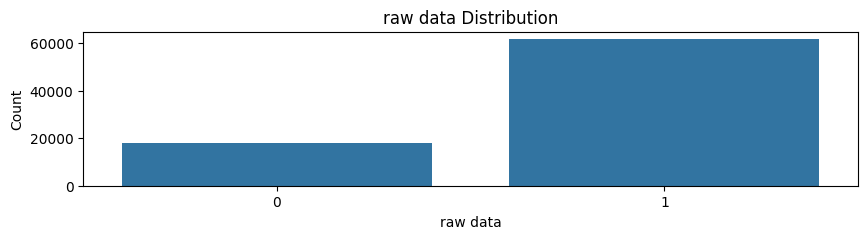

Decision Tree
[[ 1944  2599]
 [ 2437 12979]]
Naive Bayes
[[  895  3648]
 [   14 15402]]
LDA Algo
[[  898  3645]
 [    1 15415]]
K-NN Algo
[[ 1876  2667]
 [ 2117 13299]]
           decisiontree     naive       LDA       knn
Accuracy       0.747683  0.816524  0.817326  0.760309
Precision      0.833162  0.808504  0.808762  0.832958
Recall         0.841917  0.999092  0.999935  0.862675
F1 Score       0.837517  0.893750  0.894245  0.847556
Over sampling


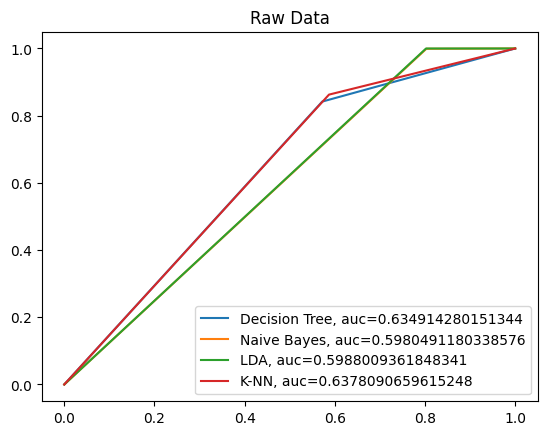

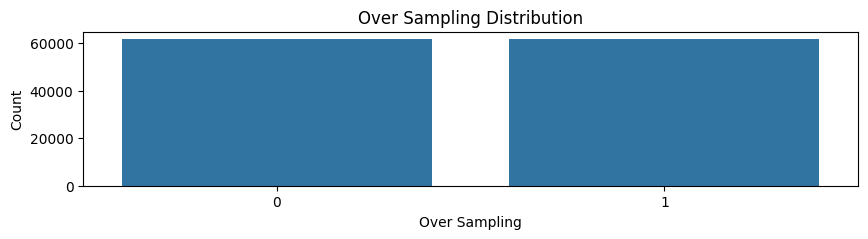

Decision Tree
[[ 2027  2516]
 [ 2563 12853]]
Naive Bayes
[[2984 1559]
 [5971 9445]]
LDA Algo
[[ 2578  1965]
 [ 4247 11169]]
K-NN Algo
[[ 2206  2337]
 [ 2857 12559]]
           decisiontree     naive       LDA       knn
Accuracy       0.745528  0.622727  0.688762  0.739767
Precision      0.836294  0.858324  0.850388  0.843112
Recall         0.833744  0.612675  0.724507  0.814673
F1 Score       0.835017  0.714989  0.782417  0.828649
Under sampling


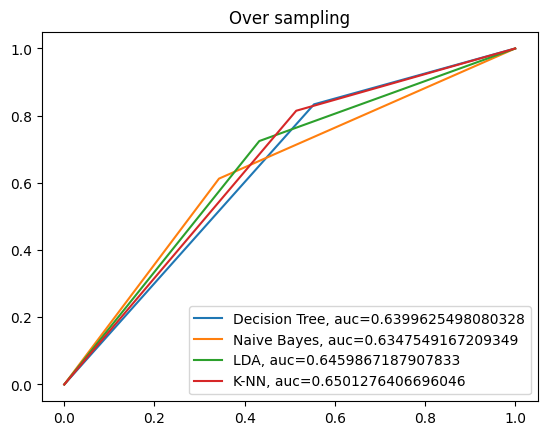

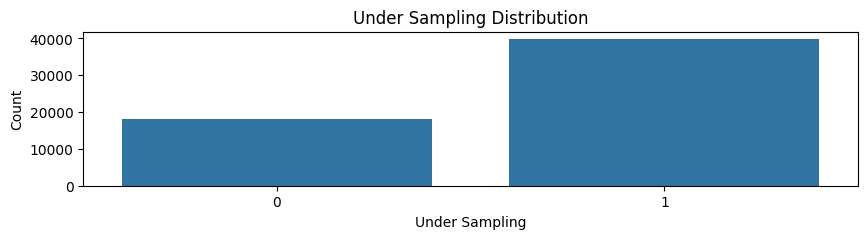

Decision Tree
[[ 2517  2026]
 [ 4283 11133]]
Naive Bayes
[[  979  3564]
 [  182 15234]]
LDA Algo
[[ 1014  3529]
 [  158 15258]]
K-NN Algo
[[ 2549  1994]
 [ 4934 10482]]
           decisiontree     naive       LDA       knn
Accuracy       0.683902  0.812315  0.815271  0.652888
Precision      0.846037  0.810405  0.812157  0.840173
Recall         0.722172  0.988194  0.989751  0.679943
F1 Score       0.779213  0.890513  0.892202  0.751613
Balanced sampling


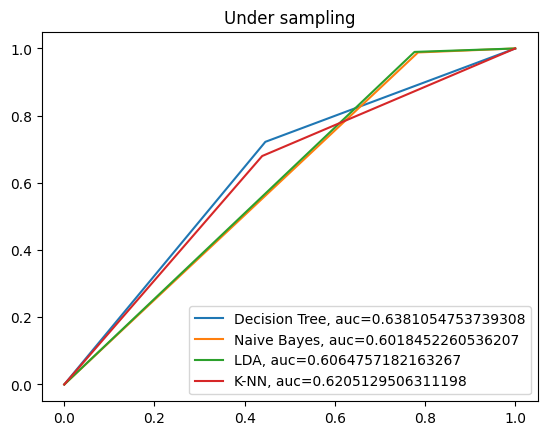

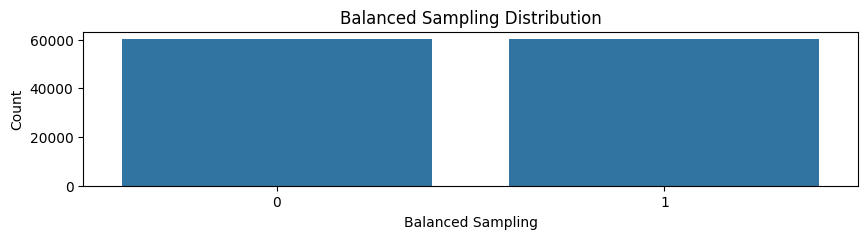

Decision Tree
[[ 1973  2570]
 [ 2562 12854]]
Naive Bayes
[[3011 1532]
 [6087 9329]]
LDA Algo
[[ 2532  2011]
 [ 4152 11264]]
K-NN Algo
[[ 2171  2372]
 [ 2963 12453]]
           decisiontree     naive       LDA       knn
Accuracy       0.742873  0.618267  0.691217  0.732702
Precision      0.833377  0.858945  0.848512  0.840000
Recall         0.833809  0.605150  0.730669  0.807797
F1 Score       0.833593  0.710051  0.785194  0.823584


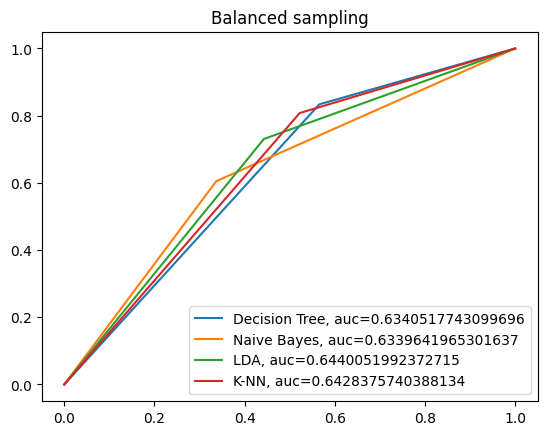

In [14]:
if __name__ == "__main__":
    main()